In [ ]:
# Uploading data from BiqQuery and further analysis in python. Property on Neste

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from pandas.io import gbq
import pandas_profiling as pp
import numpy as np
from scipy import stats
#import squarify
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import datetime as dt
!pip install pandas_gbq

In [16]:
from google.cloud import bigquery
# Hidden actual names
client = bigquery.Client()
sql = """
SELECT * FROM r-instance.smth
UNION ALL
SELECT * FROM r-instance.smth
"""
df = client.query(sql).to_dataframe()

In [3]:
df = df[df['Transaction_Date'] > '2019-06-01']

In [231]:
df = df[df['Transaction_Date'] < '2020-01-31']

In [215]:
print(np.unique(df['Segment']))


['AGRICULTURE' 'COMMERCIAL' 'CONSTRUCTION' 'FOREIGN' 'OWN USE' 'PUBLIC'
 'RESELLER' 'RETAIL' 'TRUCKING' 'WASTE']


In [218]:
df_7street = df[df['Site_Address'].astype(str) != '5675 7th Street Keyes CA']


In [17]:
df_7street = df

In [145]:
df_7street = df_7street[df_7street['Identity_Number'] != 9999995]

In [168]:
df_7street = df_7street[df_7street['Identity_Number'] != 0]

In [294]:
ch = df_7street.set_index('Transaction_Date')

ID
0         AxesSubplot(0.125,0.2;0.775x0.68)
118       AxesSubplot(0.125,0.2;0.775x0.68)
126       AxesSubplot(0.125,0.2;0.775x0.68)
138       AxesSubplot(0.125,0.2;0.775x0.68)
187       AxesSubplot(0.125,0.2;0.775x0.68)
                        ...                
382580    AxesSubplot(0.125,0.2;0.775x0.68)
902102    AxesSubplot(0.125,0.2;0.775x0.68)
902299    AxesSubplot(0.125,0.2;0.775x0.68)
902300    AxesSubplot(0.125,0.2;0.775x0.68)
963167    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Quantity, Length: 208, dtype: object

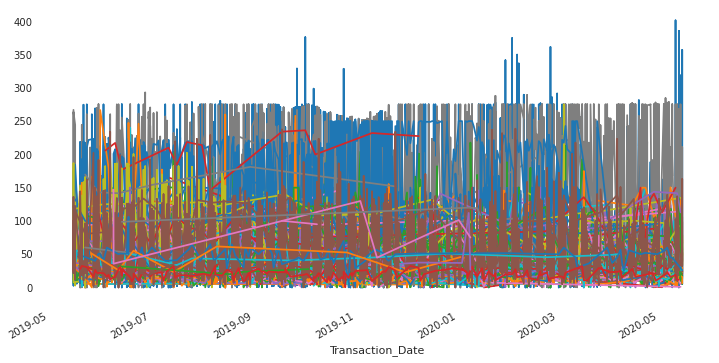

In [295]:
ch.groupby(['ID'])['Quantity'].plot( figsize =(12,6), legend=False)

In [147]:
df_7street[df_7street["Quantity"]<0]

,Site_Address,Transaction_Type,Branded_Unbranded,Transaction_Date,Transaction_Time,Pump_Number,Quantity,Neste_Branding_Date,Identity_Number,Segment,MET_EXTRACT_TIME


In [226]:
df_7street = df_7street[df_7street['Transaction_Date'] > '2019-05-15']

In [23]:
df_7street =df

In [24]:
rfm_data = df_7street [['Transaction_Date', 'Identity_Number', 'Quantity', 'Segment']]
rfm_data.rename(columns = {'Transaction_Date':'date'}, inplace = True)
rfm_data.rename(columns = {'Identity_Number':'ID'}, inplace = True)
rfm_data['Transaction_Date_First'] = rfm_data['date']
rfm_data['Transaction_Date_Last'] = rfm_data['date']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
NOW = dt.datetime(2020,5,15)  #aslast day is 15 may 2020
rfm = rfm_data.groupby('ID').agg({'date' : lambda x:(NOW - x.max()).days,
                                  'ID' : lambda x:len(x),
                                  'Quantity' : lambda x: x.sum(),
                                  'Transaction_Date_First': lambda x: x.min(), 
                                  'Transaction_Date_Last': lambda x: x.max()    }
                                                  )
rfm['Duration'] = rfm['Transaction_Date_Last'] - rfm['Transaction_Date_First']

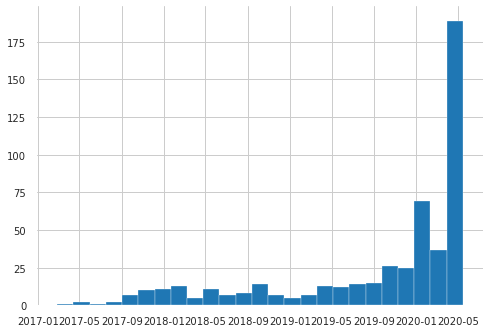

In [26]:
rfm['Transaction_Date_Last'].hist(bins=25)

In [11]:
rfm

,date,ID,Quantity,Transaction_Date_First,Transaction_Date_Last,Duration
ID,,,,,,
0,0,21776,1208242.599,2019-06-02,2020-05-15,348 days
105,110,2,115.802,2019-09-08,2020-01-26,140 days
112,158,4,99.202,2019-10-22,2019-12-09,48 days
118,2,66,2167.361,2019-06-04,2020-05-13,344 days
125,107,104,3231.689,2019-06-03,2020-01-29,240 days
...,...,...,...,...,...,...
9008033,287,1,20.215,2019-08-02,2019-08-02,0 days
9008044,119,8,762.309,2019-06-11,2020-01-17,220 days
9008520,109,33,3112.210,2019-06-10,2020-01-27,231 days


In [ ]:
#################################7thsteet###

In [130]:
df = df.drop([13490, 16058], axis=0)

In [180]:
df_id = df.groupby(['ID'])

In [131]:
df.reset_index(drop=True, inplace=True)

In [132]:
df = df[df['Transaction_Date'] > '2019-05-15']

In [ ]:
rfm_data = df[['Transaction_Date', 'Identity_Number', 'Quantity', 'Segment']]
rfm_data.rename(columns = {'Transaction_Date':'date'}, inplace = True)
rfm_data.rename(columns = {'Identity_Number':'ID'}, inplace = True)
rfm_data['Transaction_Date_First'] = rfm_data['date']
rfm_data['Transaction_Date_Last'] = rfm_data['date']


In [134]:
df1 = df
df1.rename(columns = {
    'Identity_Number':'ID'
}, inplace = True)

In [ ]:
df1

In [ ]:
rfm_data

In [240]:
df_7street['Transaction_Date'].max()

Timestamp('2020-01-30 00:00:00')

As the last available time is 2020 15 May.
We do behavioral segmentation by 3 important features. 
Recency, Frequency, Monetary.
Recency shows the number of days since the last purchase, Frequency is equal to number of transactions made over a given period
Monetary amount spent over a given period of time.

Group the features by Percentiles or quantiles, Pareto rule 80/21, Business acumen.

In [27]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279861 entries, 0 to 279860
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    279861 non-null  datetime64[ns]
 1   ID                      279861 non-null  int64         
 2   Quantity                279861 non-null  float64       
 3   Segment                 279861 non-null  object        
 4   Transaction_Date_First  279861 non-null  datetime64[ns]
 5   Transaction_Date_Last   279861 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 12.8+ MB


Calculating Recency, Requency, monetary value

In [139]:
NOW = dt.datetime(2020,5,15)  #aslast day is 15 may 2020
rfm = rfm_data.groupby('ID').agg({'date' : lambda x:(NOW - x.max()).days,
                                  'ID' : lambda x:len(x),
                                  'Quantity' : lambda x: x.sum(),
                                  'Transaction_Date_First': lambda x: x.min(), 
                                  'Transaction_Date_Last': lambda x: x.max()    }
                                                  )
rfm['Duration'] = rfm['Transaction_Date_Last'] - rfm['Transaction_Date_First']

In [140]:
rfm['Duration'] = rfm['Transaction_Date_Last'] - rfm['Transaction_Date_First']

In [141]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 9999995
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   date                    384 non-null    int64          
 1   ID                      384 non-null    int64          
 2   Quantity                384 non-null    float64        
 3   Transaction_Date_First  384 non-null    datetime64[ns] 
 4   Transaction_Date_Last   384 non-null    datetime64[ns] 
 5   Duration                384 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), timedelta64[ns](1)
memory usage: 21.0 KB


In [28]:
rfm.rename(columns = {
    'date':'recency',
    'ID': 'frequency',
    'Quantity': 'monetary'
}, inplace = True)

In [29]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)


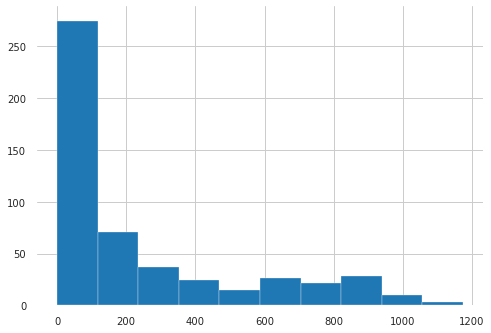

In [30]:
rfm['recency'].hist()

RFM score. 


In [31]:
rfm['R_quartile'] = pd.qcut(rfm['recency'], 5, ['5','4','3','2','1'],  duplicates='drop')
rfm['F_quartile'] = pd.qcut(rfm['frequency'], 5, ['1','2','3','4','5'], duplicates='drop')
rfm['V_quartile'] = pd.qcut(rfm['monetary'], 5, ['1','2','3','4','5'], duplicates='drop')

In [32]:
rfm['RFV_Score'] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) + rfm.V_quartile.astype(str)
rfm['RFV_Score'] = rfm['RFV_Score'].astype(int)

In [33]:
rfm['R_quartile'] = rfm['R_quartile'].astype(int)
rfm['F_quartile'] = rfm['F_quartile'].astype(int)
rfm['V_quartile'] = rfm['V_quartile'].astype(int)

In [34]:
rfm['Segment'] = rfm['R_quartile'].map(str) + rfm['F_quartile'].map(str) + rfm['V_quartile'].map(str)


In [35]:
rfm['Segment'] 

ID
0          555
48         111
105        322
112        333
118        544
          ... 
9008033    221
9008044    334
9008520    344
9008569    344
9999995    355
Name: Segment, Length: 511, dtype: object

In [2]:
segt_map = {
    r'[2-3][2-3][2-3]': 'hibernating',
    r'[1-3][2-5][2-5]': 'at risk',
    r'1[4-5][4-5]': 'can\'t loose',
    r'[2-3][1-2][1-2]': 'about to sleep',
    r'[3-4][3-4][3-4]': 'need attention',
    r'[2-4][3-4][4-5]': 'loyal customers',
    r'[3-4]11': 'promising',
    r'[4-5]11': 'new customers',
    r'[3-5][1-4][1-4]': 'potential loyalists',
    r'[4-5][4-5][4-5]': 'champions',
    r'1[1-2][1-2]' : 'anyway lost'
    
    
}

rfm['Segment'] = rfm['Segment'].replace(segt1_map, regex=True)

NameError: name 'rfm' is not defined

In [1]:
segt1_map = {
    #Gold tier
    r'[4-5]55': 'champion',
    r'[4-5][3-5][4-5]': 'loyal customer',
    #Potentials (Silver tier)
    r'[3-5][1-2][3-5]': 'potential, bulk buyer',
    r'[3-5][3-5]3': 'potential, frequent buyer',
    #Fresh customers (Bronze tier)
    r'[4-5]1[1-2]': 'new customer',
    r'[4-5][2-5][1-2]': 'rising customer',
    #Risk group (Very important)
    r'[1-3]55': 'can\'t lose',
    r'[1-3][3-5][4-5]': 'at risk',
    #lost potential (Important)
    r'[1-2][1-2][3-5]': 'lost potential, bulk buyer',
    r'[1-2][3-5]3': 'lost potential, frequent buyer',
    #Lost customers (Not Important)
    r'[1-2][1-5][1-2]': 'lost customer',
    r'3[1-5][1-2]': 'losing customer'
    
}


In [37]:
segt2_map = {
    #Gold tier
    r'[4-5][3-5][4-5]': 'gold',
    #Potentials (Silver tier)
    r'[3-5][1-5][3-5]': 'silver',
    #Fresh customers (Bronze tier)
    r'[4-5][1-5][1-2]': 'bronze',
    #Risk group (Very important)
    r'[1-3][3-5][4-5]': 'very important',
    #lost potential (Important)
    r'[1-2][1-5][3-5]': 'important',
    #Lost customers (Not Important)
    r'[1-3][1-5][1-2]': 'not important'

    
}


In [38]:
rfm['Segment1'] = rfm['R_quartile'].map(str) + rfm['F_quartile'].map(str) + rfm['V_quartile'].map(str)

In [39]:
rfm['Segment'] = rfm['Segment1'].replace(segt1_map, regex=True)

In [40]:
#Analyzing data


In [40]:
rfm['Tier'] = rfm['Segment1'].replace(segt2_map, regex=True)

In [ ]:
rfm.groupby('ID').sum().sort_values('monetary', ascending = False).head(20)

In [ ]:
plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [43]:
import seaborn as sns

In [123]:
#rfm.to_gbq(destination_table='ahmaasam.RFV_VDP_WSO_combined_Dana', project_id='r-instance', if_exists='fail')

1it [00:03,  3.20s/it]


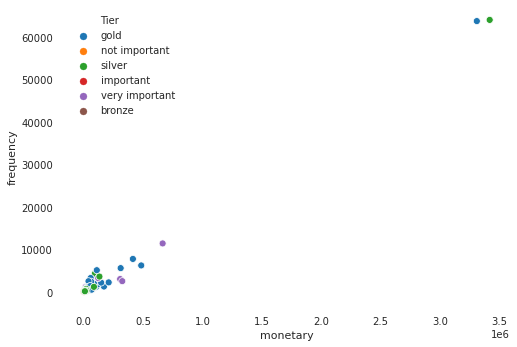

In [44]:

ax = sns.scatterplot(y="frequency", x="monetary", hue="Tier",
                      legend="full",data= rfm)

In [ ]:
#a = rfm[rfm['RFV_Score'].astype(int) == 543]
a = rfm[rfm['Segment'] == 'at risk' ,rfm['Segment'] == 'champions']

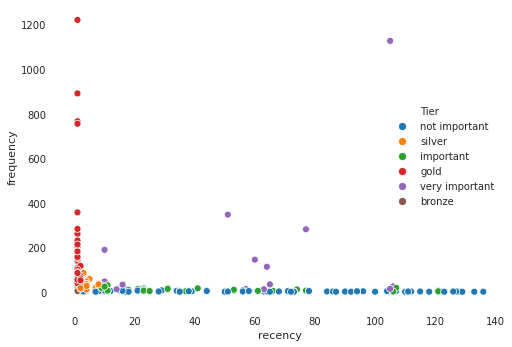

In [208]:
ax = sns.scatterplot(y="frequency", x="recency", hue="Tier",
                     data= rfm)

------------------------------Start

In [45]:
from mpl_toolkits import mplot3d

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [62]:
rfm_silv = rfm[rfm['Tier'] =='silver']
rfm_ni = rfm[rfm['Tier'] =='not important']
rfm_i = rfm[rfm['Tier'] =='important']
rfm_g = rfm[rfm['Tier'] =='gold']
rfm_vi = rfm[rfm['Tier'] =='very important']
rfm_br = rfm[rfm['Tier'] =='bronze']

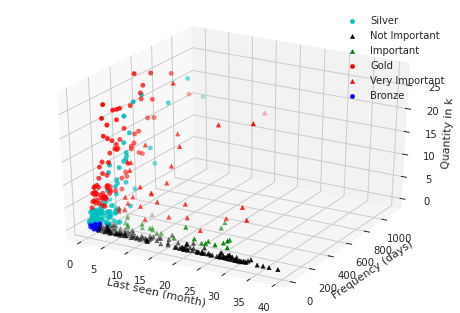

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Data for a three-dimensional line
z1 = rfm_silv['monetary']/1000
x1 = rfm_silv['recency']/30
y1 = rfm_silv['frequency'] 

z2 = rfm_ni['monetary']/1000
x2 = rfm_ni['recency']/30
y2 = rfm_ni['frequency'] 

z3 = rfm_i['monetary']/1000
x3 = rfm_i['recency']/30
y3 = rfm_i['frequency'] 

z4 = rfm_g['monetary']/1000
x4 = rfm_g['recency']/30
y4 = rfm_g['frequency'] 

z5 = rfm_vi['monetary']/1000
x5 = rfm_vi['recency']/30
y5 = rfm_vi['frequency'] 

z6 = rfm_br['monetary']/1000
x6 = rfm_br['recency']/30
y6 = rfm_br['frequency'] 

ax.scatter(x1, y1, z1, c = 'c', marker='o', label='Silver')
ax.scatter(x2, y2, z2, c = 'k', marker='^',label='Not Important')
ax.scatter(x3, y3, z3, c = 'g', marker='^',label='Important')
ax.scatter(x4, y4, z4, c = 'r', marker='o',label='Gold')
ax.scatter(x5, y5, z5, c = 'r', marker='^',label='Very Important')
ax.scatter(x6, y6, z6, c = 'b', marker='o',label='Bronze')
leg=ax.legend()
ax.set_xlabel('Last seen (month)')
ax.set_ylabel('Frequency (days)')
ax.set_zlabel('Quantity in k')

plt.show()

In [50]:
rfm['monetary'].mean()

28493.111545988257

In [59]:
rfm1=rfm

In [60]:
rfm=rfm1[rfm1['monetary'] <28000]

-----------------------------------------End

In [46]:
a['recency'].describe()

count     39.000000
mean     101.256410
std       38.616003
min       12.000000
25%       72.500000
50%      109.000000
75%      132.500000
max      158.000000
Name: recency, dtype: float64

In [53]:
import seaborn as sns

In [79]:
b = pd.merge(a, df1, on = 'ID', how = 'left', indicator = True)

In [83]:
b['Site_Address'].nunique()

2

------------------------------Analyzing champions-------------------------

In [65]:
b555=b[b['RFV_Score'].astype(int) == 555]

In [66]:
b555['ID'].nunique()

45

In [ ]:
b555=b[b['RFV_Score'].astype(int) == 445]

Segment based

In [ ]:
#Commercial

In [150]:
b_com = b[b['Segment_y'].astype(str) == 'COMMERCIAL']

ID
0         AxesSubplot(0.125,0.2;0.775x0.68)
100475    AxesSubplot(0.125,0.2;0.775x0.68)
100566    AxesSubplot(0.125,0.2;0.775x0.68)
106802    AxesSubplot(0.125,0.2;0.775x0.68)
382580    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Quantity, dtype: object

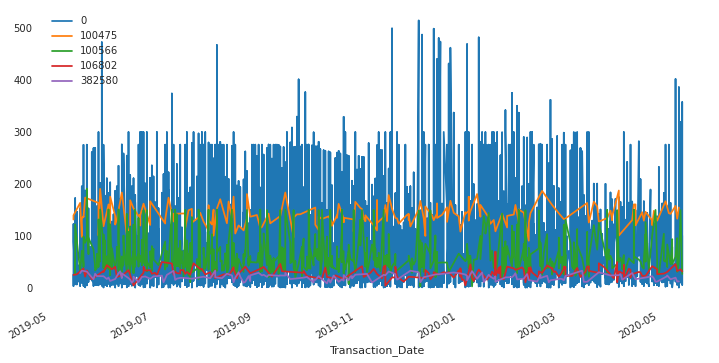

In [63]:
#Foreign
b_f = b[b['Segment_y'].astype(str) == 'FOREIGN']
#sns.boxplot(x = 'ID', y = 'Quantity', data = b_tr).set_title('FOREIGN') 
b_f.groupby(['ID'])['Quantity'].plot( figsize =(12,6), legend=True)

-------------------------------------------End of champions----------------------------------------------------

----------------------------Start of at risk -----------------------

In [184]:
a = rfm[rfm['Segment'] == 'need attention']

In [185]:
a['recency'].describe()

count    25.000000
mean      6.120000
std       2.948446
min       3.000000
25%       3.000000
50%       7.000000
75%       9.000000
max      11.000000
Name: recency, dtype: float64

In [173]:
a.reset_index()
df1 = df1[['Transaction_Date', 'ID', 'Quantity', 'Segment', 'Site_Address']]
b = pd.merge(a, df1, on = 'ID', how = 'left', indicator = True)
b = b.set_index('Transaction_Date')


Text(0.5, 1.0, 'at risk ')

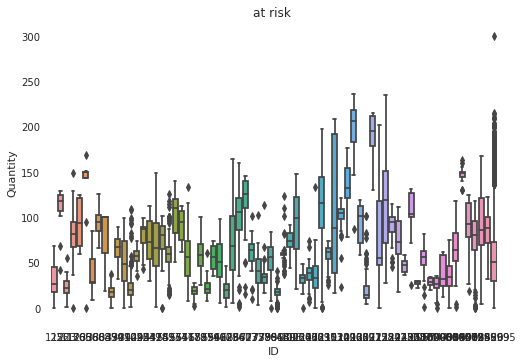

In [174]:
sns.boxplot(x = 'ID', y = 'Quantity', data = b).set_title('at risk ') 


In [145]:
b555['Segment_y'].value_counts()

FOREIGN         23264
COMMERCIAL       8356
TRUCKING         5952
RESELLER         4189
OWN USE          3176
CONSTRUCTION     2539
WASTE            2174
Name: Segment_y, dtype: int64

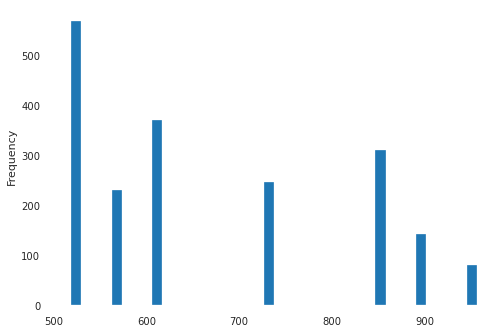

In [165]:
b['recency'].plot.hist(bins=40)

In [168]:
b['recency'].describe()

count    1951.000000
mean      667.803178
std       146.584339
min       519.000000
25%       519.000000
50%       611.000000
75%       855.000000
max       956.000000
Name: recency, dtype: float64

In [166]:
recent = b[b['recency']<365]

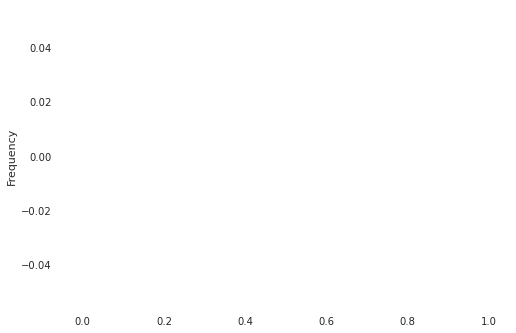

In [167]:
recent['recency'].plot.hist(bins=50)

In [147]:
b['Transaction_Date_Last'].value_counts()
#recent.groupby('Transaction_Date_Last').sum().sort_values('Quantity', ascending = False).head()

2020-01-31    71646
2019-07-11    11380
2019-08-15     5473
2020-02-28     4270
2019-10-19     3227
              ...  
2018-12-29        9
2017-08-28        9
2017-12-01        9
2017-12-28        8
2017-08-10        8
Name: Transaction_Date_Last, Length: 82, dtype: int64

-------------------Plotting---------------------------------------

In [ ]:
b = b.set_index('Transaction_Date')

In [ ]:
b

[Text(0, 0.5, 'Quantity')]

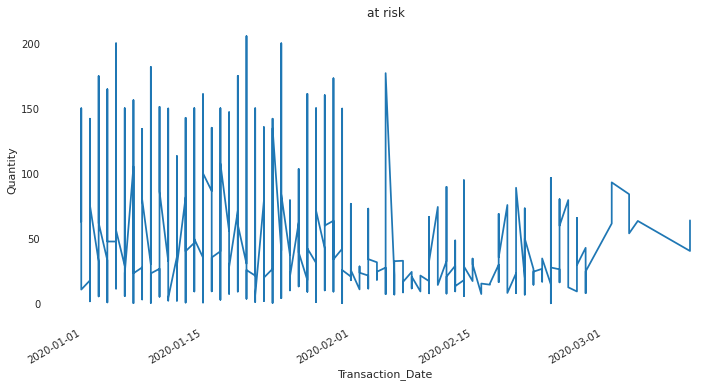

In [158]:
ylabel='Quantity'
ax = b['Quantity']['2020-01-01':'2020-05-10'].plot(figsize=(12,6), title = 'at risk')
ax.set(ylabel=ylabel)

-----------------------------------------------------------------------------------------------------------------------

Take one year window

------------------------------------------

In [46]:
rfm.groupby('Segment').sum().sort_values('monetary', ascending = False).head()

,recency,frequency,monetary,R_quartile,F_quartile,V_quartile,RFV_Score
Segment,,,,,,,
champions,1590,154461,7728888,376,390,378,41878
at risk,38595,108618,5893842,222,377,386,26356
loyal customers,554,5590,372691,147,117,130,16000
need attention,1972,4338,229086,216,179,184,23574
can't loose,5701,1951,150960,8,35,35,1185


In [ ]:
a.index =pd.to_datetime(a.index)

In [27]:
ref_seg['RFMClass'].astype(int).describe()

count    511.000000
mean     278.193738
std      120.333229
min      111.000000
25%      177.500000
50%      311.000000
75%      421.500000
max      444.000000
Name: RFMClass, dtype: float64